In [91]:
from collections import Counter
from collections import defaultdict
from string import punctuation

import numpy as np
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [92]:
%matplotlib inline

In [93]:
articles_df = pd.read_csv(
    'data/articles_df.csv',
    converters={
        'AUTHORS': eval,
        'KEYWORDS': eval,
        'MESH': eval,
        'PUB_TYPE': eval,
    },
    parse_dates=['DATE']
).fillna('')

In [94]:
articles_df.shape

(72384, 12)

In [95]:
sss=set()
for x in articles_df.MESH:
    for y in x:
        sss.add(y)

In [96]:
len(sss)

8090

In [97]:
sss

{'Emotional Intelligence',
 'Perioperative Care',
 'Epidemiologic Studies',
 'Anonymous Testing',
 'Fisheries',
 'Religion and Sex',
 'Immunologic Factors',
 'Physical Exertion',
 'Rosa',
 'Universities',
 'Transplantation, Heterologous',
 'Tomography, Emission-Computed, Single-Photon',
 'Antiretroviral Therapy, Highly Active',
 'Tuberculosis, Gastrointestinal',
 'Patient Discharge Summaries',
 'Cerebral Hemorrhage',
 'Consumer Product Safety',
 'Pregnancy Complications, Infectious',
 'Hibernation',
 'Education, Nursing',
 'Lymphoma, Non-Hodgkin',
 'Metabolomics',
 'Voice Disorders',
 'Lipid Metabolism',
 'Social Responsibility',
 'Medical Writing',
 'Projection',
 'Family Health',
 'Community Health Workers',
 'Cyclothymic Disorder',
 'Antibiotics, Antitubercular',
 'Head',
 'Anorexia Nervosa',
 'Diet Fads',
 'Silicone Elastomers',
 'Infusions, Intravenous',
 'Hospital-Physician Relations',
 'Gulf War',
 'Trinidad and Tobago',
 'Hospital Bed Capacity, 500 and over',
 'Health Services 

In [5]:
articles_df.head()

,ID,TITLE,AUTHORS,ABSTRACT,DATE,KEYWORDS,LANGUAGE,MESH,PUB_TYPE,JOURNAL,VOLUME,ISSUE
0,713,Plasma/blood level monitoring techniques in ps...,"[T B Cooper, G M Simpson]",,1975-10-01,[],eng,"[Enzyme Induction, Humans, Lithium, Methods, P...",[Journal Article],Psychopharmacology bulletin,11,4
1,1316,Psychiatric myths and their victims.,[S Page],,1976-01-01,[],eng,"[Allied Health Personnel, Hospitals, Psychiatr...",[Journal Article],Dimensions in health service,53,1
2,4393,Psychiatric consultations with gynecologic pat...,[J J Schwab],,1975-01-01,[],eng,"[Counseling, Female, Genital Diseases, Female,...",[Journal Article],International journal of fertility,20,3
3,4485,The heterogeneity of asthmatic patients--an in...,"[S L Spector, R S Farr]",,1976-05-01,[],eng,"[Adrenal Cortex Hormones, Adrenergic beta-Anta...","[Case Reports, Journal Article, Research Suppo...",The Journal of allergy and clinical immunology,57,5
4,6339,Ovulatory failure: clinical aspects.,[A E Rakoff],,1976-05-01,[],eng,"[17-Ketosteroids, Animals, Anovulation, Chorio...","[Journal Article, Review]",Fertility and sterility,27,5


In [6]:
years_dict = defaultdict(int)
for x in articles_df.DATE:
    years_dict[x.year] += 1

In [7]:
years_range = [min(years_dict.keys()), max(years_dict.keys())]

In [8]:
years_range

[1945, 2016]

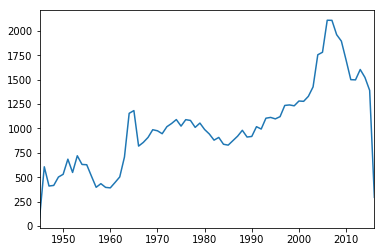

In [9]:
pd.Series(years_dict).plot();

In [10]:
abstracts_df = pd.DataFrame()
abstracts_df['ABSTRACT'] = articles_df['ABSTRACT']
abstracts_df['YEAR'] = articles_df.DATE.apply(lambda x: x.year)
abstracts_df['HAS_ABSTRACT'] = abstracts_df['ABSTRACT'].apply(lambda x: bool(x))

In [11]:
abstracts_df.HAS_ABSTRACT.value_counts()

False    47269
True     25115
Name: HAS_ABSTRACT, dtype: int64

In [12]:
n_abs = abstracts_df.groupby(['YEAR', 'HAS_ABSTRACT']).count()

In [13]:
n_abs.head()

ABSTRACT
YEAR HAS_ABSTRACT          
1945 False               83
1946 False              607
1947 False              409
     True                 1
1948 False              416

In [14]:
n_abs = n_abs.unstack('HAS_ABSTRACT').fillna(0).astype(int)

In [15]:
n_abs.head()

ABSTRACT      
HAS_ABSTRACT    False True 
YEAR                       
1945               83     0
1946              607     0
1947              409     1
1948              416     0
1949              499     3

In [16]:
n_abs.columns = n_abs.columns.droplevel()

In [17]:
n_abs.head()

HAS_ABSTRACT,False,True
YEAR,,
1945,83,0
1946,607,0
1947,409,1
1948,416,0
1949,499,3


In [18]:
n_abs['TOTAL'] = pd.Series(abstracts_df.groupby(['YEAR']).count()['ABSTRACT'])

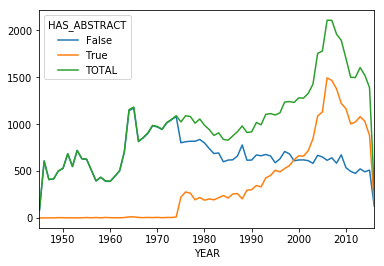

In [19]:
n_abs.plot();

In [20]:
stop = stopwords.words('english') + list(punctuation)

def clean(s):
    r = s.strip().lower()
    r = [w for w in word_tokenize(r) if w not in stop and len(w) > 2]
    r = ' '.join(r)
    return r

In [21]:
%%time

all_text = ''
for x in articles_df.TITLE:
    all_text += clean(x) + ' '
for x in articles_df.ABSTRACT:
    all_text += clean(x) + ' '

CPU times: user 1min 13s, sys: 272 ms, total: 1min 13s
Wall time: 1min 13s


In [22]:
counter = Counter(all_text.split())

In [23]:
counter.most_common(20)

[('psychiatry', 23371),
 ('health', 19097),
 ('psychiatric', 18242),
 ('patients', 17494),
 ('care', 16550),
 ('medical', 13791),
 ('research', 13334),
 ('mental', 12384),
 ('nursing', 11775),
 ('study', 11682),
 ('clinical', 11277),
 ('practice', 10630),
 ('treatment', 10038),
 ('psychiatrists', 9225),
 ('social', 8290),
 ('medicine', 8271),
 ('psychology', 7991),
 ('training', 7757),
 ('patient', 7398),
 ('factors', 7066)]

In [24]:
def join_texts(x):
    title = clean(x.TITLE)
    abstract = clean(x.ABSTRACT)
    text = title + ' ' + abstract
    return text

In [25]:
mini_df = pd.DataFrame()

In [26]:
%%time

mini_df['TEXT'] = articles_df.apply(join_texts, axis=1)

CPU times: user 1min 29s, sys: 12 ms, total: 1min 29s
Wall time: 1min 29s


In [27]:
mini_df['YEAR'] = articles_df.DATE.apply(lambda x: x.year)

In [28]:
mini_df['KEYWORDS'] = articles_df.KEYWORDS

In [29]:
mini_df['MESH'] = articles_df.MESH

In [30]:
text_by_year_df = mini_df.groupby('YEAR')['TEXT'].sum()

In [31]:
text_by_year_df.head()

YEAR
1945    available available available notes implicatio...
1946    available available available available availa...
1947    conception control medical profession attitude...
1948    abbreviated form mcgill verbal situation test ...
1949    psychology scientific research scientific inqu...
Name: TEXT, dtype: object

In [32]:
counter_by_year_sr = text_by_year_df.apply(lambda x: Counter(x.split()))

In [33]:
for year, row in counter_by_year_sr.iteritems():
    print(year, row.most_common(5))

1945 [('psychiatric', 19), ('available', 16), ('psychiatry', 15), ('hospital', 6), ('general', 6)]
1946 [('psychiatry', 110), ('available', 80), ('psychiatric', 78), ('psychology', 38), ('training', 32)]
1947 [('psychiatry', 88), ('psychiatric', 60), ('available', 59), ('psychology', 29), ('treatment', 20)]
1948 [('psychiatry', 89), ('available', 71), ('psychiatric', 34), ('psychology', 32), ('general', 18)]
1949 [('available', 89), ('psychiatry', 86), ('psychiatric', 61), ('psychology', 43), ('mental', 25)]
1950 [('psychiatry', 152), ('psychology', 63), ('psychiatric', 43), ('clinical', 33), ('mental', 27)]
1951 [('psychiatry', 221), ('psychology', 97), ('psychiatric', 92), ('child', 38), ('clinical', 33)]
1952 [('psychiatry', 187), ('psychology', 81), ('psychiatric', 64), ('clinical', 46), ('medical', 22)]
1953 [('psychiatry', 193), ('psychology', 127), ('psychiatric', 96), ('clinical', 58), ('psychological', 44)]
1954 [('psychiatry', 155), ('psychology', 74), ('psychiatric', 66), ('

In [34]:
def words_df(*ws, prop=False):
    return pd.DataFrame(
        [[counter_by_year_sr[y][w] / (sum(counter_by_year_sr[y].values()) if prop else 1) for w in ws] for y in counter_by_year_sr.index],
        index=counter_by_year_sr.index,
        columns=ws,
    )

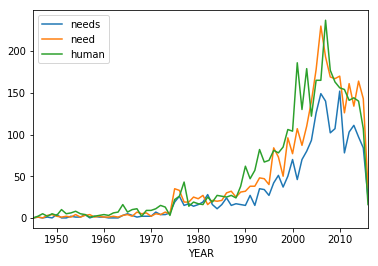

In [90]:
words_df('needs', 'need', 'human').plot();

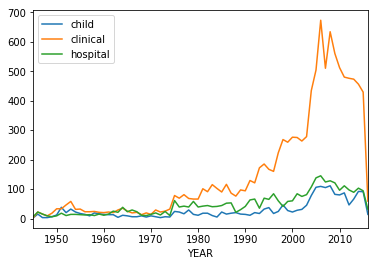

In [86]:
words_df('child', 'clinical', 'hospital').plot();

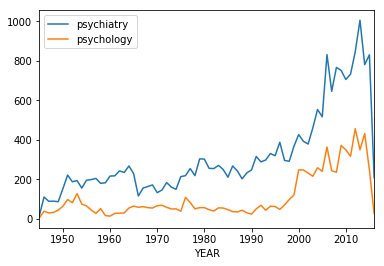

In [35]:
words_df('psychiatry', 'psychology').plot();

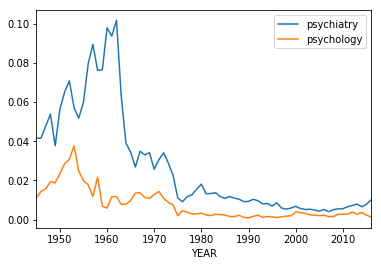

In [36]:
words_df('psychiatry', 'psychology', prop=True).plot();

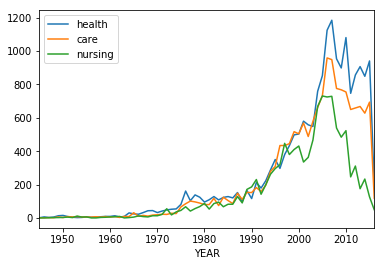

In [37]:
words_df('health', 'care', 'nursing').plot();

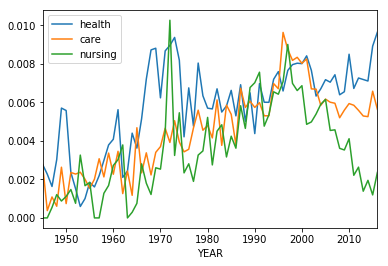

In [38]:
words_df('health', 'care', 'nursing', prop=True).plot();

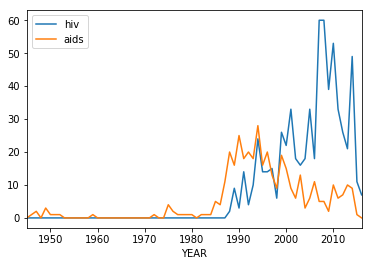

In [39]:
words_df('hiv', 'aids').plot();

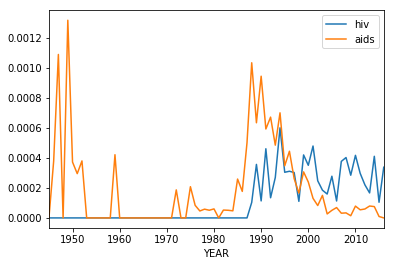

In [40]:
words_df('hiv', 'aids', prop=True).plot();

In [41]:
text_by_year_df

YEAR
1945    available available available notes implicatio...
1946    available available available available availa...
1947    conception control medical profession attitude...
1948    abbreviated form mcgill verbal situation test ...
1949    psychology scientific research scientific inqu...
1950    new aspects criminological psychology graduate...
1951    child psychology social psychology group proce...
1952    restatement combat psychiatry relation civilia...
1953    transportation military psychiatric patients i...
1954    teaching psychology fundamental science medici...
1955    association maternal fetal factors development...
1956    galla oroma east africa breast feeding technic...
1957    psychology profession modern world comment wor...
1958    size family adjustment children soviet psychia...
1959    social psychiatry modifications oropharyngeal ...
1960    clitoridectomy disastrous downfall isaac baker...
1961    psycho-pathology mind economic planning progno...
1962    p

In [42]:
corpus = [TaggedDocument(d.split(), [y]) for y, d in text_by_year_df.iteritems()]

In [84]:
for y, d in text_by_year_df.iteritems():
    print(y)

1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [43]:
docs = [[word for word in document.split() if counter[word] > 1] for document in text_by_year_df]

In [44]:
dictionary = Dictionary(docs)

In [45]:
print(dictionary)

Dictionary(45502 unique tokens: ['liberty', 'dissident', 'conspicuous', "'enriched", 'nonwork-related']...)


In [78]:
%%time

model = Doc2Vec(corpus, size=100, window=8, min_count=5, workers=4)
for epoch in range(10):
    model.train(corpus, total_words=45502, epochs=model.iter)

CPU times: user 1min 50s, sys: 316 ms, total: 1min 51s
Wall time: 31.8 s


In [47]:
model.wv.most_similar('aids')

[('experimenter', 0.8986614942550659),
 ('applications', 0.8970330357551575),
 ('triggered', 0.8966612219810486),
 ('tool', 0.8926774859428406),
 ('newer', 0.8918147087097168),
 ('cns', 0.8841125965118408),
 ('experts', 0.8825504779815674),
 ('relied', 0.8823146224021912),
 ('etiopathogenesis', 0.881948709487915),
 ('round', 0.8818533420562744)]

In [69]:
model.wv.most_similar('aids')

[('tool', 0.9200758934020996),
 ('habilitation', 0.8953475952148438),
 ('applications', 0.8920917510986328),
 ('experts', 0.8717107772827148),
 ('caution', 0.8695406913757324),
 ('operational', 0.8689188957214355),
 ('facilitation', 0.86811363697052),
 ('aid', 0.8644483089447021),
 ('laboratory', 0.8601976633071899),
 ('adventure', 0.8574331998825073)]

In [48]:
model.wv.most_similar('hiv')

[('plasma', 0.9923834800720215),
 ('p=0.03', 0.9907107949256897),
 ('sal', 0.9906556606292725),
 ('bmd', 0.9891386032104492),
 ('soc', 0.9873744249343872),
 ('lgmd', 0.9869552850723267),
 ('crp', 0.9868426322937012),
 ('hepatitis', 0.9855906963348389),
 ('inversely', 0.9855843782424927),
 ('il-6', 0.9854450225830078)]

In [70]:
model.wv.most_similar('hiv')

[('stressors', 0.9951415061950684),
 ('sal', 0.9929070472717285),
 ('lbp', 0.9904746413230896),
 ('inversely', 0.9877574443817139),
 ('hpv', 0.9876781105995178),
 ('pain-related', 0.987163245677948),
 ('il-8', 0.9862829446792603),
 ('self-esteem', 0.9844965934753418),
 ('latitude', 0.9842010736465454),
 ('correlate', 0.9839476346969604)]

In [71]:
model.wv.most_similar('psychology')

[('friendship', 0.6751246452331543),
 ('straw', 0.6316784024238586),
 ('subconscious', 0.6273894309997559),
 ('exemplifies', 0.6125169992446899),
 ('mentality', 0.6071226000785828),
 ('schulz', 0.5913663506507874),
 ('berkeley', 0.5904630422592163),
 ('bruno', 0.5899583101272583),
 ('psychedelics', 0.5875880718231201),
 ('geology', 0.5845799446105957)]

In [72]:
model.wv.most_similar('psychiatry')

[('polyclinic', 0.701877772808075),
 ('revue', 0.6521822214126587),
 ('extracts', 0.6475133299827576),
 ('neurology', 0.6122575998306274),
 ('bulgaria', 0.611499547958374),
 ('censorship', 0.5965133905410767),
 ('neuropsychiatry', 0.5922375917434692),
 ('oslo', 0.5905669331550598),
 ('prospects', 0.5891656875610352),
 ('oslerian', 0.5857377648353577)]

In [73]:
model.wv.similarity('psychiatry', 'neurology')

0.61225759636232124

In [85]:
model.docvecs.most_similar(2016, topn=71)

[(1997, 0.9795751571655273),
 (1981, 0.9794868230819702),
 (2013, 0.973941445350647),
 (2002, 0.9687871932983398),
 (1996, 0.9678640365600586),
 (2014, 0.9675271511077881),
 (2000, 0.9668636322021484),
 (1998, 0.9655039310455322),
 (2010, 0.9627140760421753),
 (1987, 0.9595898985862732),
 (1995, 0.958412766456604),
 (2005, 0.9576836824417114),
 (1988, 0.9568926095962524),
 (1999, 0.956405758857727),
 (2007, 0.956404447555542),
 (1983, 0.9559649229049683),
 (1993, 0.9549148678779602),
 (1992, 0.95469731092453),
 (2004, 0.9546909332275391),
 (1985, 0.9542409181594849),
 (1986, 0.9539651274681091),
 (1991, 0.9530795812606812),
 (1984, 0.9528173804283142),
 (2003, 0.9523483514785767),
 (1982, 0.9522498846054077),
 (1994, 0.9521410465240479),
 (2012, 0.9504722356796265),
 (2015, 0.9495976567268372),
 (2006, 0.947373628616333),
 (1990, 0.9468055963516235),
 (2001, 0.9466189742088318),
 (1980, 0.9419625997543335),
 (1989, 0.9237038493156433),
 (2008, 0.9152470827102661),
 (2009, 0.90690207481